https://medium.com/technology-invention-and-more/how-to-build-a-simple-neural-network-in-9-lines-of-python-code-cc8f23647ca1

In [1]:
import numpy as np

In [14]:
training_set_inputs = np.array([[0, 0, 1], [1, 1, 1],
                                [1, 0, 1], [0, 1, 1]])
training_set_outputs = np.array([[0, 1, 1, 0]]).T
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1
for iteration in np.arange(10000):
    output = 1 / (1 + np.exp(-(np.dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += np.dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))
print(1 / (1 + np.exp(-(np.dot(np.array([1, 0, 0]), synaptic_weights)))))

[0.99993704]


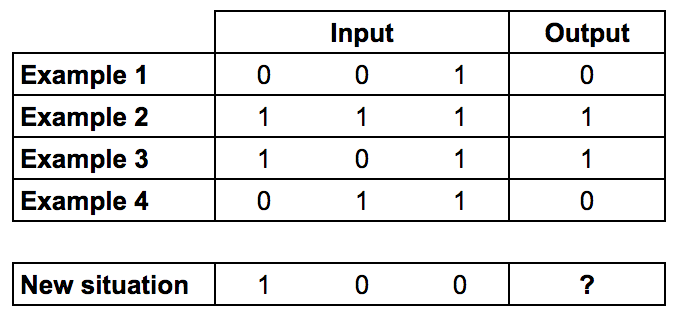

 An input with a large positive weight or a large negative weight, will have a strong effect on the neuron’s output. Before we start, we set each weight to a random number. Then we begin the training process:

1. Take the inputs from a training set example, adjust them by the weights, and pass them through a special formula to calculate the neuron’s output.
2. Calculate the error, which is the difference between the neuron’s output and the desired output in the training set example.
3. Depending on the direction of the error, adjust the weights slightly.
4. Repeat this process 10, 000 times.

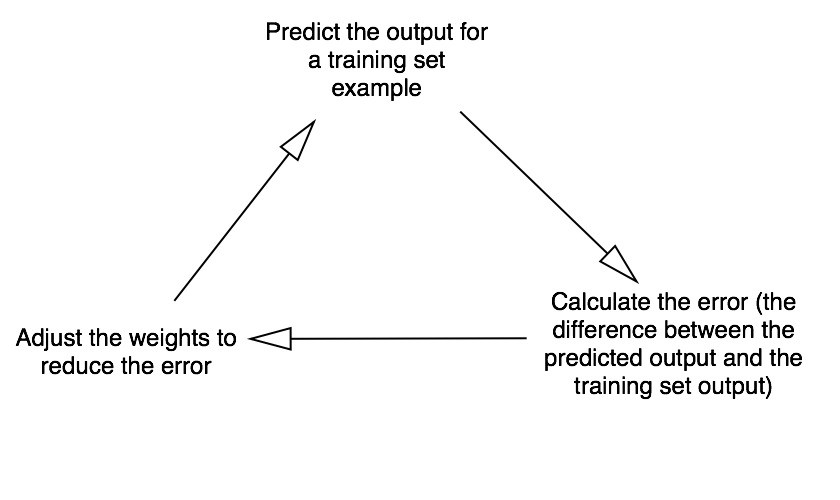

then we normalise this, so the result is between 0 and 1, using the function Sigmoid

$$\frac{1}{1 + e^{-x}}$$

So by substituting the first equation into the second, the final formula for the output of the neuron is:

$$\text{Output of neuron} = \frac{1}{1+e^{(\sum{weight_i input_i})}}$$

# Formula for adjusting the weights

During the training cycle (Diagram 3), we adjust the weights. But how much do we adjust the weights by? We can use the “Error Weighted Derivative” formula:

$$\omega_{n + 1} = error.input.SigmoidCurveGradient(output)$$

Why this formula? First we want to make the adjustment proportional to the size of the error. Secondly, we multiply by the input, which is either a 0 or a 1. If the input is 0, the weight isn’t adjusted. Finally, we multiply by the gradient of the Sigmoid curve (Diagram 4). To understand this last one, consider that:

1. We used the Sigmoid curve to calculate the output of the neuron.
2. If the output is a large positive or negative number, it signifies the neuron was quite confident one way or another.
3. From Diagram 4, we can see that at large numbers, the Sigmoid curve has a shallow gradient.
4. If the neuron is confident that the existing weight is correct, it doesn’t want to adjust it very much. Multiplying by the Sigmoid curve gradient achieves this.

The gradient of the Sigmoid curve, can be found by taking the derivative:

$$SigmoidCurveGradient(output) = output.(1-output)$$

So by substituting the second equation into the first equation, the final formula for adjusting the weights is:

$$\omega_{n + 1} = error.input.output.(1-output)$$

There are alternative formulae, which would allow the neuron to learn more quickly, but this one has the advantage of being fairly simple.

In [ ]:
from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in xrange(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


#Intialise a single neuron neural network.
neural_network = NeuralNetwork()

print "Random starting synaptic weights: "
print neural_network.synaptic_weights

# The training set. We have 4 examples, each consisting of 3 input values
# and 1 output value.
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

# Train the neural network using a training set.
# Do it 10,000 times and make small adjustments each time.
neural_network.train(training_set_inputs, training_set_outputs, 10000)

print "New synaptic weights after training: "
print neural_network.synaptic_weights

# Test the neural network with a new situation.
print "Considering new situation [1, 0, 0] -> ?: "
print neural_network.think(array([1, 0, 0]))

In [21]:
synaptic_weights

array([[ 9.67299303],
       [-0.2078435 ],
       [-4.62963669]])